## Data Analysis and Preprocessing

In [3]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

from models.scripts.utils import load_csv, drop_columns, impute_rolling_median, display_missing_values, save_to_csv

In [4]:
file_path = 'data/hourly/btc_lunarcrush_timeseries_hourly.csv'

df = load_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38656 entries, 0 to 38655
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   asset_id                   38656 non-null  int64         
 1   timestamp                  38656 non-null  int64         
 2   time                       38656 non-null  datetime64[ns]
 3   open                       38575 non-null  float64       
 4   close                      38656 non-null  float64       
 5   high                       38575 non-null  float64       
 6   low                        38575 non-null  float64       
 7   volume                     29967 non-null  float64       
 8   volume_24h                 30136 non-null  float64       
 9   market_cap                 38601 non-null  float64       
 10  circulating_supply         30408 non-null  float64       
 11  url_shares                 38474 non-null  float64       
 12  uniq

In [5]:
df.describe()

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,social_contributors,influential_content,influential_content_score,social_volume,social_volume_global,social_dominance,market_cap_global,market_dominance,social_volume_calc_24h,social_score_calc_24h
count,38656.0,3.865600e+04,38656,38575.000000,38656.000000,38575.000000,38575.000000,2.996700e+04,3.013600e+04,3.860100e+04,...,33674.000000,24109.000000,2.410800e+04,38656.000000,37898.000000,37866.000000,3.788400e+04,37884.000000,0.0,0.0
mean,1.0,1.637494e+09,2021-11-21 11:27:47.849751808,27729.672615,27707.667698,27829.158741,27625.151563,1.750238e+09,1.892501e+11,5.260254e+11,...,9901.385164,94.747853,5.217490e+04,11041.606038,49503.436224,28.016443,1.166456e+12,50.084601,NaN,NaN
min,1.0,1.567037e+09,2019-08-29 00:00:00,4545.087790,4267.292258,4589.712024,4267.292258,2.373622e+08,4.813293e+09,8.393765e+10,...,0.000000,1.000000,7.000000e+00,0.000000,717.000000,0.003876,1.223398e+11,16.059891,NaN,NaN
25%,1.0,1.602705e+09,2020-10-14 19:45:00,11842.623298,11862.473446,11857.641410,11825.501758,8.936159e+08,1.962372e+10,2.193665e+11,...,5040.250000,39.000000,1.985300e+04,4863.000000,14119.000000,18.032702,4.500118e+11,40.597149,NaN,NaN
50%,1.0,1.637494e+09,2021-11-21 11:30:00,26624.375459,26638.227945,26677.701083,26573.538931,1.429616e+09,2.847711e+10,5.179575e+11,...,9589.500000,77.000000,3.724150e+04,9715.000000,44911.500000,25.024232,1.090821e+12,48.167831,NaN,NaN
75%,1.0,1.672284e+09,2022-12-29 03:15:00,39736.849449,39640.679700,39893.966207,39543.541706,2.190108e+09,3.891479e+10,7.516046e+11,...,13345.000000,126.000000,6.215325e+04,14746.000000,73506.250000,36.914645,1.665817e+12,60.717419,NaN,NaN
max,1.0,1.707073e+09,2024-02-04 19:00:00,68843.221165,68610.174732,69114.233109,68682.417611,1.025374e+11,1.414339e+15,1.294632e+12,...,135323.000000,11593.000000,8.865258e+06,275425.000000,515359.000000,99.831309,7.290602e+12,76.977663,NaN,NaN
std,0.0,4.017324e+07,NaN,15552.015932,15506.036282,15623.167273,15476.869275,1.707107e+09,1.419517e+13,2.943482e+11,...,6390.307566,138.587695,1.030868e+05,8843.892710,37617.224012,13.115268,7.158432e+11,10.472387,NaN,NaN


In [6]:
print("Number of null values per column:")
counts = df.count().to_frame()
counts.columns = ['count']
counts['nulls'] = df.shape[0] - counts['count']
counts

Number of null values per column:


,count,nulls
asset_id,38656,0
timestamp,38656,0
time,38656,0
open,38575,81
close,38656,0
...,...,...
social_dominance,37866,790
market_cap_global,37884,772
market_dominance,37884,772
social_volume_calc_24h,0,38656


In [7]:
df.head()

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,social_contributors,influential_content,influential_content_score,social_volume,social_volume_global,social_dominance,market_cap_global,market_dominance,social_volume_calc_24h,social_score_calc_24h
0,1,1567036800,2019-08-29,9699.30,9492.81,9709.59,9344.69,NaN,NaN,1.704075e+11,...,NaN,NaN,NaN,36275,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1567123200,2019-08-30,9453.74,9587.25,9699.85,9368.27,NaN,NaN,1.721211e+11,...,NaN,NaN,NaN,34181,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1567209600,2019-08-31,9603.96,9624.54,9714.11,9512.03,NaN,NaN,1.724485e+11,...,NaN,NaN,NaN,28833,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1567296000,2019-09-01,9646.58,9768.36,9823.53,9578.66,NaN,NaN,1.748100e+11,...,NaN,NaN,NaN,31799,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1567382400,2019-09-02,9783.44,10387.50,10459.00,9764.76,NaN,NaN,1.854709e+11,...,NaN,NaN,NaN,37664,NaN,NaN,NaN,NaN,NaN,NaN


### Data Visualization

In [8]:
def plot_price_and_volume(df):
    fig, ax1 = plt.subplots(figsize=(15, 5))

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Close Price', color=color)
    ax1.plot(df['time'], df['close'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx() 

    color = 'tab:blue'
    ax2.set_ylabel('Volume', color=color)
    ax2.plot(df['time'], df['volume'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Close Price and Volume Trend')
    plt.show()

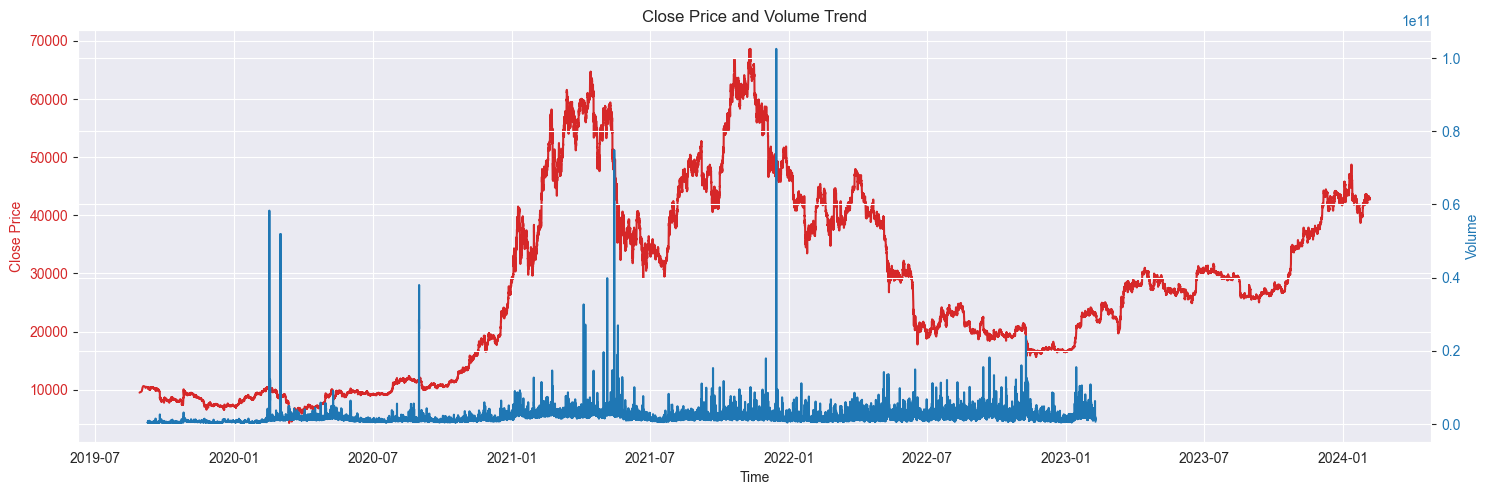

In [9]:
plot_price_and_volume(df)

In [10]:
def plot_social_media_sentiment(df):
    fig, ax1 = plt.subplots(figsize=(15, 5))

    color = 'tab:green'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Tweets', color=color)
    ax1.plot(df['time'], df['tweets'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.set_ylabel('Social Score', color=color)
    ax2.plot(df['time'], df['social_score'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Social Media Sentiment: Tweets and Social Score')
    plt.show()

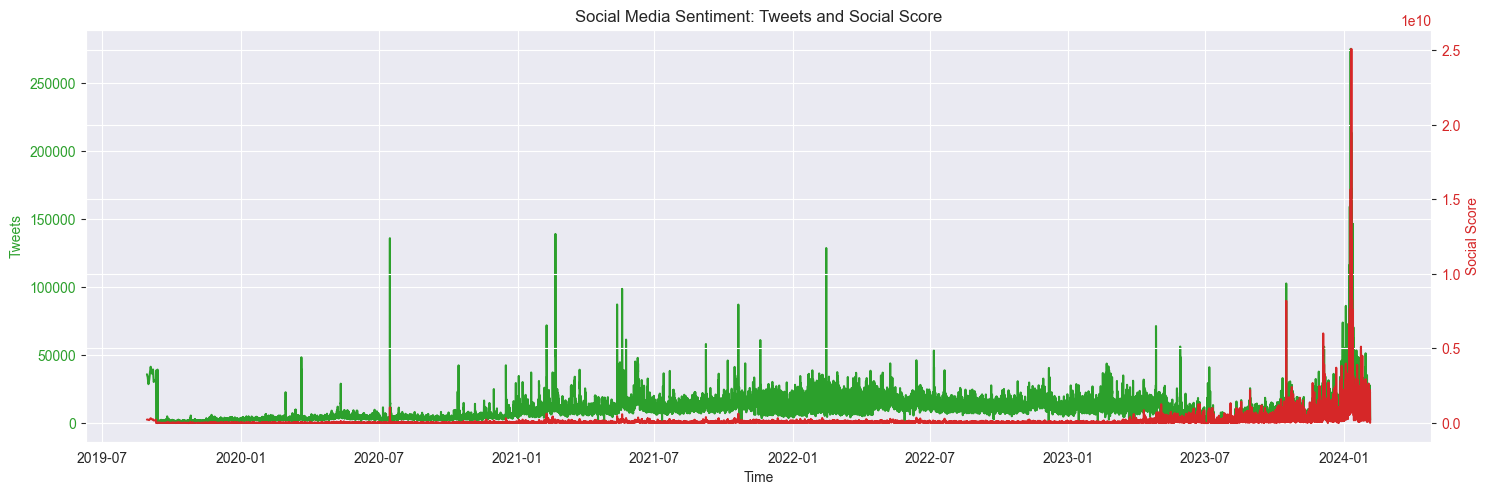

In [11]:
plot_social_media_sentiment(df)

In [12]:
def plot_time_series_sentiment_vs_price(df, sentiment_score, price='close'):
    """
    Generates a time series plot overlaying sentiment scores with price changes.

    Parameters:
    - df: DataFrame with the cryptocurrency data including 'time', a sentiment score, and price.
    - sentiment_score: The column name of the sentiment score to plot.
    - price: The column name of the price to plot (default is 'close').
    """
    # Creating a figure and a twin axis for the second plot
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel(sentiment_score, color=color)
    ax1.plot(df['time'], df[sentiment_score], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel(price, color=color)  # we already handled the x-label with ax1
    ax2.plot(df['time'], df[price], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'Time Series of {sentiment_score} and {price}')
    plt.show()

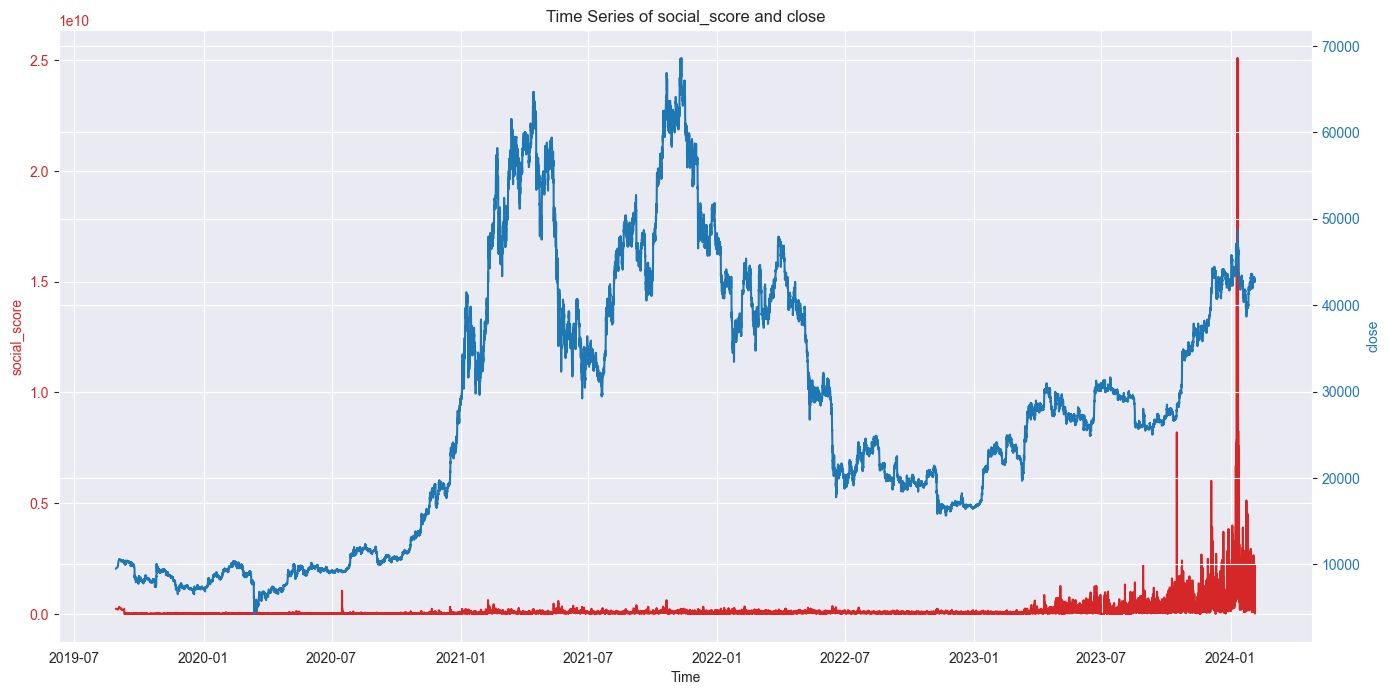

In [13]:
plot_time_series_sentiment_vs_price(df, 'social_score')

In [14]:
def plot_histogram(df, column_name, bins=30, color='skyblue'):
    """
    Plots a histogram for a specific column in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column_name: String, the name of the column to plot.
    - bins: Integer, the number of bins to use in the histogram.
    - color: String, the color of the histogram bars.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=bins, kde=False, color=color)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

In [15]:
def plot_density_plot(df, column_name, color='orange'):
    """
    Plots a density plot for a specific column in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column_name: String, the name of the column to plot.
    - color: String, the color of the density line.
    """
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[column_name], color=color, fill=True)
    plt.title(f'Density Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.show()

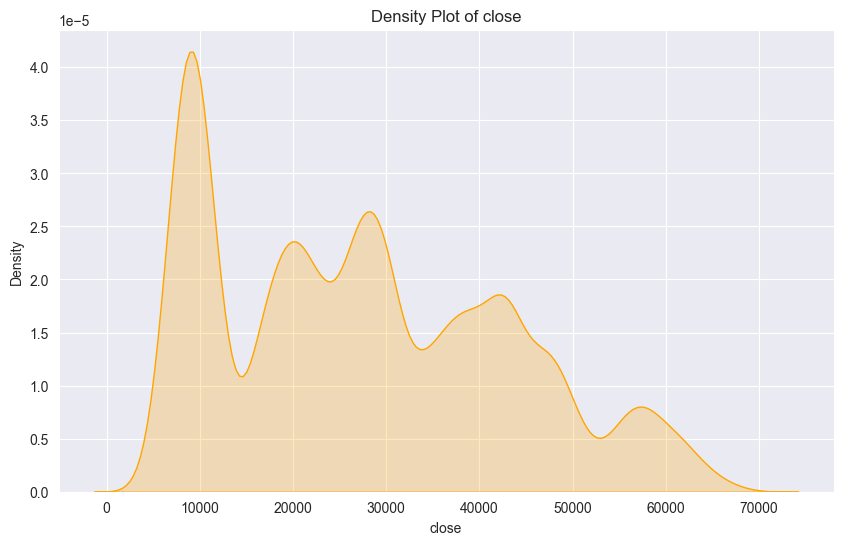

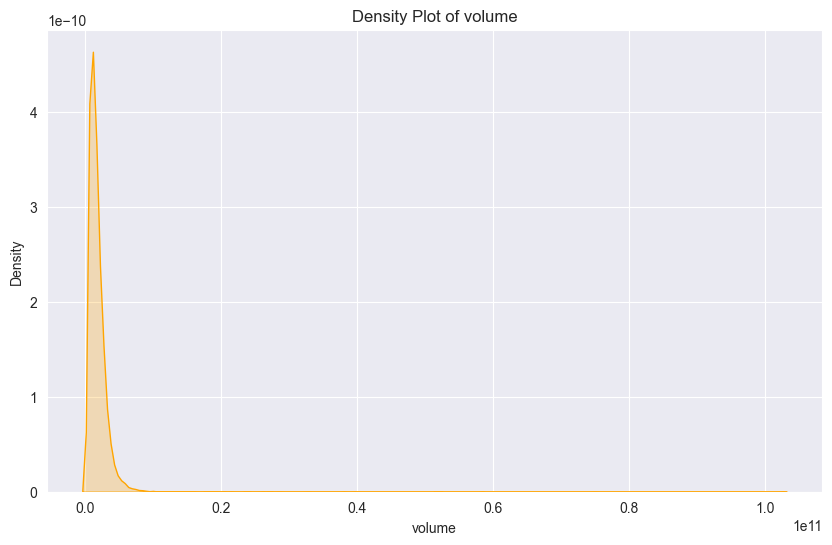

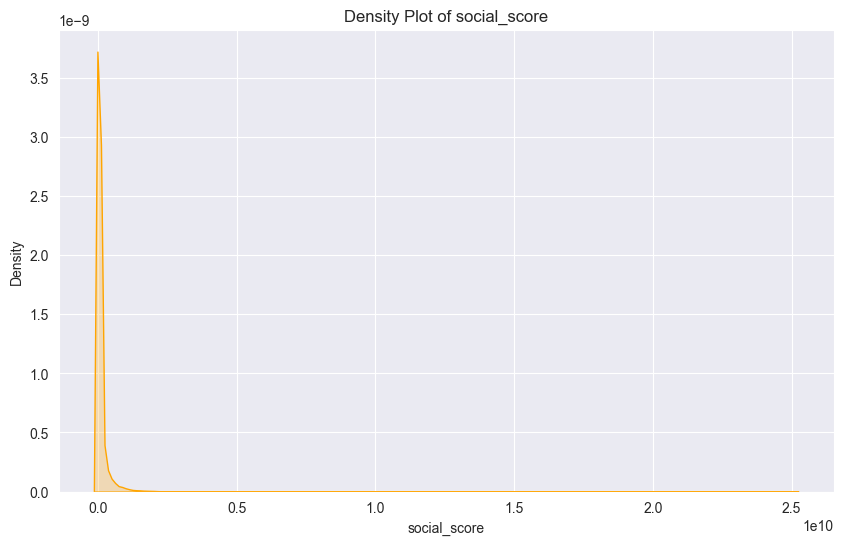

In [16]:
# Plotting density plots
plot_density_plot(df, 'close')
plot_density_plot(df, 'volume')
plot_density_plot(df, 'social_score')

In [17]:
def plot_correlation_matrix(df, features):
    # Prepare the dataset: drop rows with any missing values in the specified features
    analysis_df = df[features].dropna()

    # Calculate the Pearson correlation matrix
    correlation_matrix = analysis_df.corr()

    # Plotting the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
    plt.title('Correlation Matrix of Selected Features')
    plt.show()

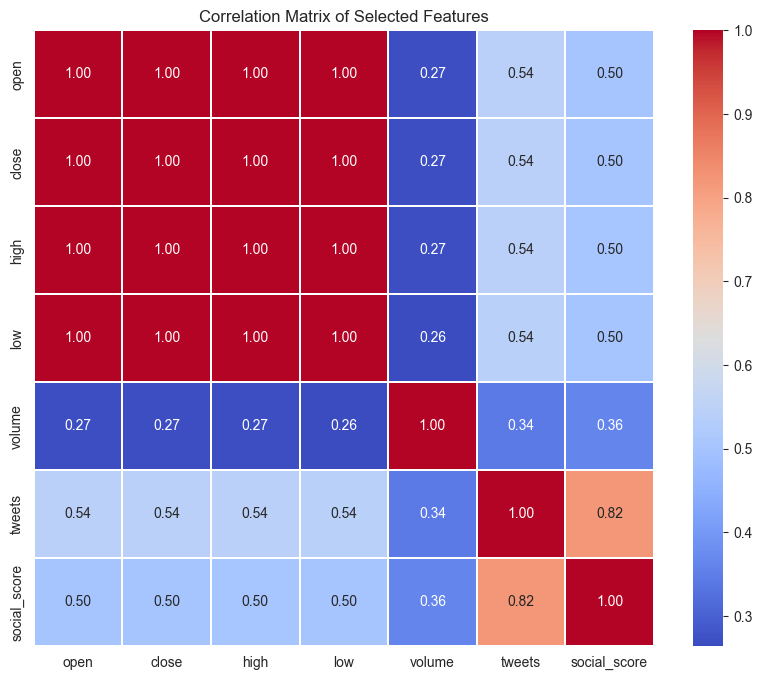

In [18]:
features_to_analyze = ['open', 'close', 'high', 'low', 'volume', 'tweets', 'social_score']

plot_correlation_matrix(df, features_to_analyze)

In [19]:
def plot_daily_price_changes(df):
    """
    Generates a box plot for daily price changes.

    Parameters:
    - df: DataFrame with the cryptocurrency data including 'open' and 'close' prices.
    """
    # Calculate daily price changes
    df['daily_price_change'] = df['close'] - df['open']

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['daily_price_change'])
    plt.title('Distribution of Daily Price Changes')
    plt.xlabel('Daily Price Change')
    plt.show()

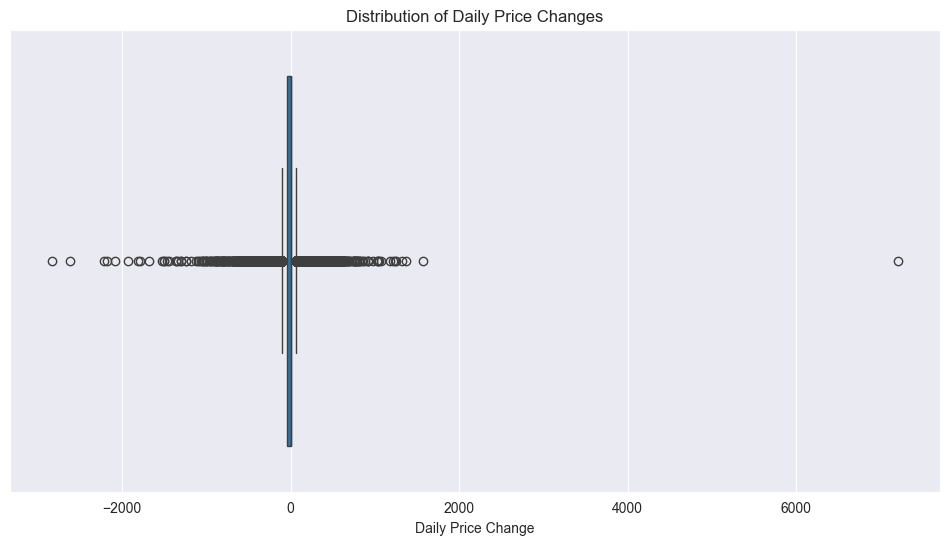

In [20]:
plot_daily_price_changes(df)

In [21]:
def plot_weekly_price_changes(df):
    """
    Generates a box plot for weekly price changes.

    Parameters:
    - df: DataFrame with the cryptocurrency data including time and daily price changes.
    """
    # Ensure 'time' is in datetime format and extract week number
    df['week'] = pd.to_datetime(df['time']).dt.isocalendar().week

    # Calculate weekly price changes
    weekly_price_changes = df.groupby('week')['daily_price_change'].sum()

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=weekly_price_changes)
    plt.title('Distribution of Weekly Price Changes')
    plt.xlabel('Weekly Price Change')
    plt.show()



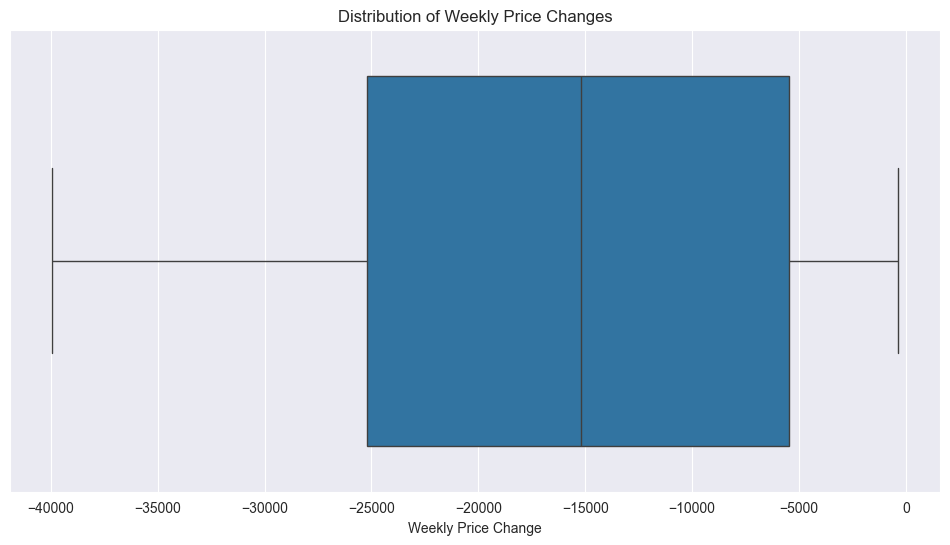

In [22]:
plot_weekly_price_changes(df)

### Data Exploring

In [23]:
missing_values_df = display_missing_values(df)
missing_values_df

,Number of Missing Values,Percentage
social_score_calc_24h,38656,100.000000
social_volume_calc_24h,38656,100.000000
tweet_score,35674,92.285803
search_average,33218,85.932326
medium,27742,71.766349
...,...,...
social_impact_score,48,0.124172
price_score,48,0.124172
social_score,48,0.124172
average_sentiment,48,0.124172


### Data Preparation


In [24]:
# Assuming 'df' is your DataFrame
threshold = 50.0  # You can adjust the threshold as needed
df = drop_columns(df, threshold)

In [25]:
missing_values_df = display_missing_values(df)
missing_values_df

,Number of Missing Values,Percentage
youtube,17730,45.866101
influential_content_score,14548,37.634520
influential_content,14547,37.631933
volume,8689,22.477752
volume_24h,8520,22.040563
circulating_supply,8248,21.336921
social_contributors,4982,12.888038
reddit_comments_score,4640,12.003311
reddit_comments,4640,12.003311
reddit_posts,4510,11.667012


In [26]:
df_final = impute_rolling_median(df)

/Users/lucapetracca/Documents/GitHub/Transformers-Financial-Time-Series-Forecasting/models/scripts/utils.py:153: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column].fillna(method='bfill', inplace=True)  # Backfill to address initial NaNs
/Users/lucapetracca/Documents/GitHub/Transformers-Financial-Time-Series-Forecasting/models/scripts/utils.py:153: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column].fillna(method='bfill', inplace=True)  # Backfill to address initial NaNs


In [27]:
df_final

,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,circulating_supply,...,social_contributors,influential_content,influential_content_score,social_volume,social_volume_global,social_dominance,market_cap_global,market_dominance,daily_price_change,week
0,1567036800,2019-08-29 00:00:00,9699.300000,9492.810000,9709.590000,9344.690000,414776885.0,2.119802e+10,1.704075e+11,18461987.0,...,936.0,58.0,16404.0,36275,7988.0,41.199299,2.332637e+11,66.321895,-206.490000,35
1,1567123200,2019-08-30 00:00:00,9453.740000,9587.250000,9699.850000,9368.270000,414776885.0,2.119802e+10,1.721211e+11,18461987.0,...,936.0,58.0,16404.0,34181,7988.0,41.199299,2.332637e+11,66.321895,133.510000,35
2,1567209600,2019-08-31 00:00:00,9603.960000,9624.540000,9714.110000,9512.030000,414776885.0,2.119802e+10,1.724485e+11,18461987.0,...,936.0,58.0,16404.0,28833,7988.0,41.199299,2.332637e+11,66.321895,20.580000,35
3,1567296000,2019-09-01 00:00:00,9646.580000,9768.360000,9823.530000,9578.660000,414776885.0,2.119802e+10,1.748100e+11,18461987.0,...,936.0,58.0,16404.0,31799,7988.0,41.199299,2.332637e+11,66.321895,121.780000,35
4,1567382400,2019-09-02 00:00:00,9783.440000,10387.500000,10459.000000,9764.760000,414776885.0,2.119802e+10,1.854709e+11,18461987.0,...,936.0,58.0,16404.0,37664,7988.0,41.199299,2.332637e+11,66.321895,604.060000,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38651,1707058800,2024-02-04 15:00:00,42865.469346,42934.174517,42939.226862,42842.713838,NaN,1.369967e+10,8.422859e+11,19618281.0,...,0.0,NaN,NaN,12777,103209.0,12.379734,1.644160e+12,51.228955,68.705170,5
38652,1707062400,2024-02-04 16:00:00,42923.343001,42897.020552,42928.457185,42869.533356,NaN,1.348879e+10,8.415604e+11,19618281.0,...,0.0,NaN,NaN,14565,113748.0,12.804621,1.646231e+12,51.120423,-26.322449,5
38653,1707066000,2024-02-04 17:00:00,42896.941893,42884.907415,42948.152936,42838.465242,NaN,1.333092e+10,8.413228e+11,19618281.0,...,0.0,NaN,NaN,16653,111131.0,14.985018,1.645906e+12,51.116092,-12.034478,5
38654,1707069600,2024-02-04 18:00:00,42886.532881,42754.413033,42924.551923,42751.718572,NaN,1.311747e+10,8.387670e+11,19618281.0,...,0.0,NaN,NaN,3501,32335.0,10.827277,1.646132e+12,50.953809,-132.119847,5


In [30]:
output_file_path = 'data/btc_timeseries.csv'  # Specify your desired path and file name
save_to_csv(df_final, output_file_path)